In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

/Users/shaayaansayed/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
iris = datasets.load_iris()

In [6]:
print('size of data: ', iris.data.shape)
print('size of labels: ', iris.target.shape)

('size of data: ', (150, 4))
('size of labels: ', (150,))


In [11]:
print('features: ', iris.data[:5, :])
print('labels: ', iris.target[:5])

('features: ', array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]]))
('labels: ', array([0, 0, 0, 0, 0]))


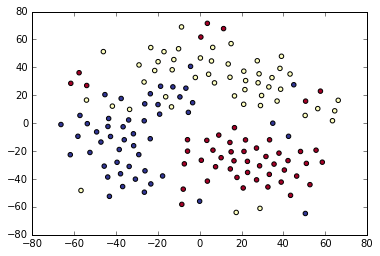

In [71]:
# use tsne to reduce dimensions 
tsne = TSNE(n_components=2, random_state=0)
X_reduce = tsne.fit_transform(iris.data)

# visualize data in lower dimensions
plt.scatter(X_reduce[:, 0], X_reduce[:, 1], c=iris.target, cmap=plt.cm.RdYlBu)
plt.show()

In [61]:
import numpy as np 

X = iris.data[:, :2]
y = iris.target

# shuffle dataset 
idx = np.arange(X.shape[0])
np.random.seed(42)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]
        
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [62]:
from sklearn.cross_validation import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
print('train size: ', X_train.shape)
print('val size: ', X_val.shape)

('train size: ', (100, 2))
('val size: ', (50, 2))


In [64]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
clf = model.fit(X_train, y_train)

In [84]:
from sklearn.metrics import accuracy_score 

y_train_predict = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print('train accuracy: ', train_accuracy)

y_val_predict = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_predict)
print('validation accuracy: ', accuracy)

('train accuracy: ', 0.94999999999999996)
('validation accuracy: ', 0.69999999999999996)


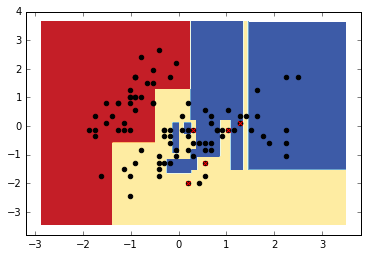

In [99]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

y_train_pred = model.predict(X_train)
correct_ix = np.where(y_train_pred-y_train == 0)
wrong_ix = np.where(y_train_pred-y_train != 0)

plt.scatter(X_train[correct_ix, 0], X_train[correct_ix, 1], marker='o', c='black')
plt.scatter(X_train[wrong_ix, 0], X_train[wrong_ix, 1], marker='x', c='red')

plt.show()

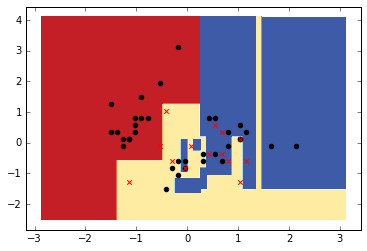

In [100]:
correct_ixx_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

y_val_pred = model.predict(X_val)
correct_ix = np.where(y_val_pred-y_val == 0)
wrong_ix = np.where(y_val_pred-y_val != 0)

plt.scatter(X_val[correct_ix, 0], X_val[correct_ix, 1], marker='o', c='black')
plt.scatter(X_val[wrong_ix, 0], X_val[wrong_ix, 1], marker='x', c='red')

plt.show()

In [76]:
y_train

array([0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1,
       1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1,
       0, 2, 0, 0, 2, 0, 1, 0])